In [1]:
cd /content/sample_data/Test

/content/sample_data/Test


In [2]:
!kaggle datasets download -d jay7080dev/rice-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/jay7080dev/rice-plant-diseases-dataset
License(s): Apache 2.0
100% 176M/176M [00:08<00:00, 25.0MB/s]
100% 176M/176M [00:08<00:00, 21.3MB/s]


In [3]:
!unzip /content/sample_data/Test/rice-plant-diseases-dataset.zip

Archive:  /content/sample_data/Test/rice-plant-diseases-dataset.zip
  inflating: rice leaf diseases dataset/Bacterialblight/BACTERAILBLIGHT3_001.jpg  
  inflating: rice leaf diseases dataset/Bacterialblight/BACTERAILBLIGHT3_002.jpg  
  inflating: rice leaf diseases dataset/Bacterialblight/BACTERAILBLIGHT3_003.jpg  
  inflating: rice leaf diseases dataset/Bacterialblight/BACTERAILBLIGHT3_004.jpg  
  inflating: rice leaf diseases dataset/Bacterialblight/BACTERAILBLIGHT3_005.jpg  
  inflating: rice leaf diseases dataset/Bacterialblight/BACTERAILBLIGHT3_006.jpg  
  inflating: rice leaf diseases dataset/Bacterialblight/BACTERAILBLIGHT3_007.jpg  
  inflating: rice leaf diseases dataset/Bacterialblight/BACTERAILBLIGHT3_008.jpg  
  inflating: rice leaf diseases dataset/Bacterialblight/BACTERAILBLIGHT3_009.jpg  
  inflating: rice leaf diseases dataset/Bacterialblight/BACTERAILBLIGHT3_010.jpg  
  inflating: rice leaf diseases dataset/Bacterialblight/BACTERAILBLIGHT3_011.jpg  
  inflating: rice l

In [4]:
## importing essential Libraries

import os
import pandas as pd
import numpy as np
import sys
import seaborn as sb
import tensorflow as tf
from tensorflow.keras import layers, models, backend
import matplotlib.pyplot as plt

## batch specification
batch_size = 50
img_height = 300
img_width = 300


## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/sample_data/Test/rice leaf diseases dataset',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '//content/sample_data/Test/rice leaf diseases dataset',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)


class_names = training_ds.class_names

Found 4684 files belonging to 3 classes.
Using 3748 files for training.
Found 4684 files belonging to 3 classes.
Using 936 files for validation.


In [5]:
class_names

['Bacterialblight', 'Brownspot', 'Leafsmut']

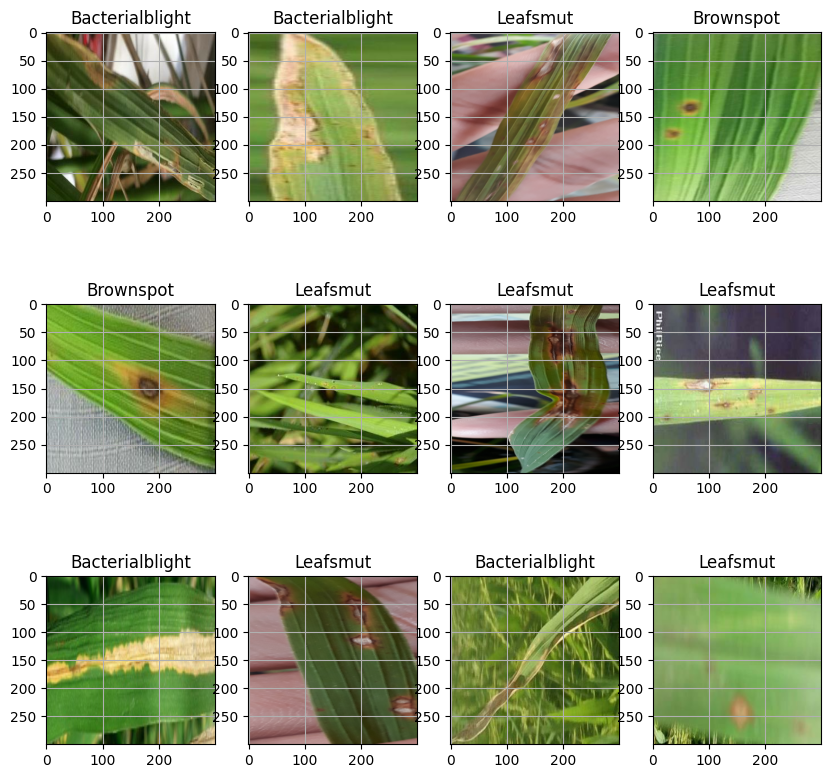

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [7]:
model = models.Sequential([
layers.Rescaling(1./255, input_shape=(img_height, img_width,3)),
layers.Conv2D(20, 3, activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(20, 3, activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(16, activation='relu'),
layers.Dense(16, activation='relu'),
layers.Dense(len(class_names), activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 20)      560       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 20)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 20)      3620      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 20)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 106580)            0

In [10]:
epochs = 15
history = model.fit(
training_ds,
validation_data=testing_ds,
epochs=epochs
)

Epoch 1/15
75/75 [==============================] - 20s 159ms/step - loss: 0.9775 - accuracy: 0.5141 - val_loss: 0.8711 - val_accuracy: 0.5726
Epoch 2/15
75/75 [==============================] - 11s 132ms/step - loss: 0.7896 - accuracy: 0.6449 - val_loss: 0.6788 - val_accuracy: 0.7297
Epoch 3/15
75/75 [==============================] - 10s 128ms/step - loss: 0.5928 - accuracy: 0.7636 - val_loss: 0.6621 - val_accuracy: 0.7500
Epoch 4/15
75/75 [==============================] - 7s 92ms/step - loss: 0.4640 - accuracy: 0.8092 - val_loss: 0.3975 - val_accuracy: 0.8387
Epoch 5/15
75/75 [==============================] - 10s 121ms/step - loss: 0.3463 - accuracy: 0.8722 - val_loss: 0.3072 - val_accuracy: 0.8793
Epoch 6/15
75/75 [==============================] - 8s 104ms/step - loss: 0.3367 - accuracy: 0.8743 - val_loss: 0.2843 - val_accuracy: 0.8932
Epoch 7/15
75/75 [==============================] - 8s 107ms/step - loss: 0.2349 - accuracy: 0.9141 - val_loss: 0.2300 - val_accuracy: 0.9145
Epo

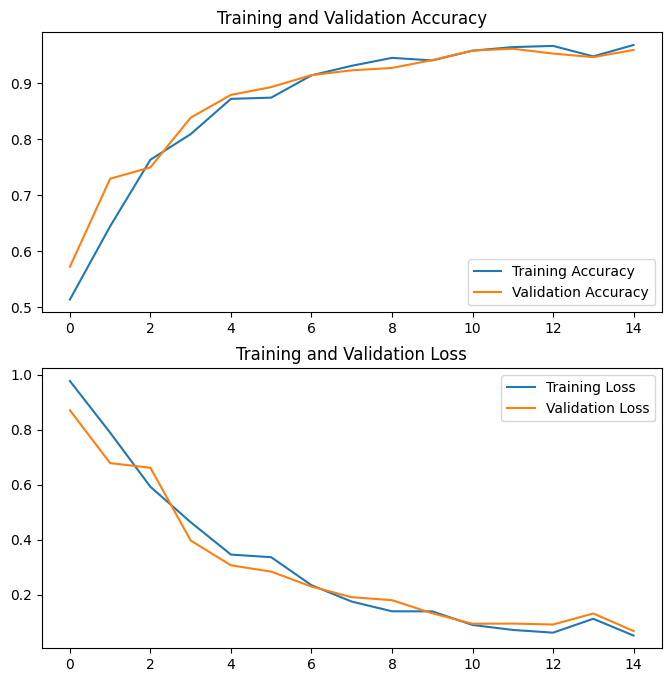

Maximum Validation Accuracy: 0.9615384340286255


In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Display the maximum validation accuracy
print("Maximum Validation Accuracy:", max(val_acc))

2/2 [==============================] - 1s 263ms/step


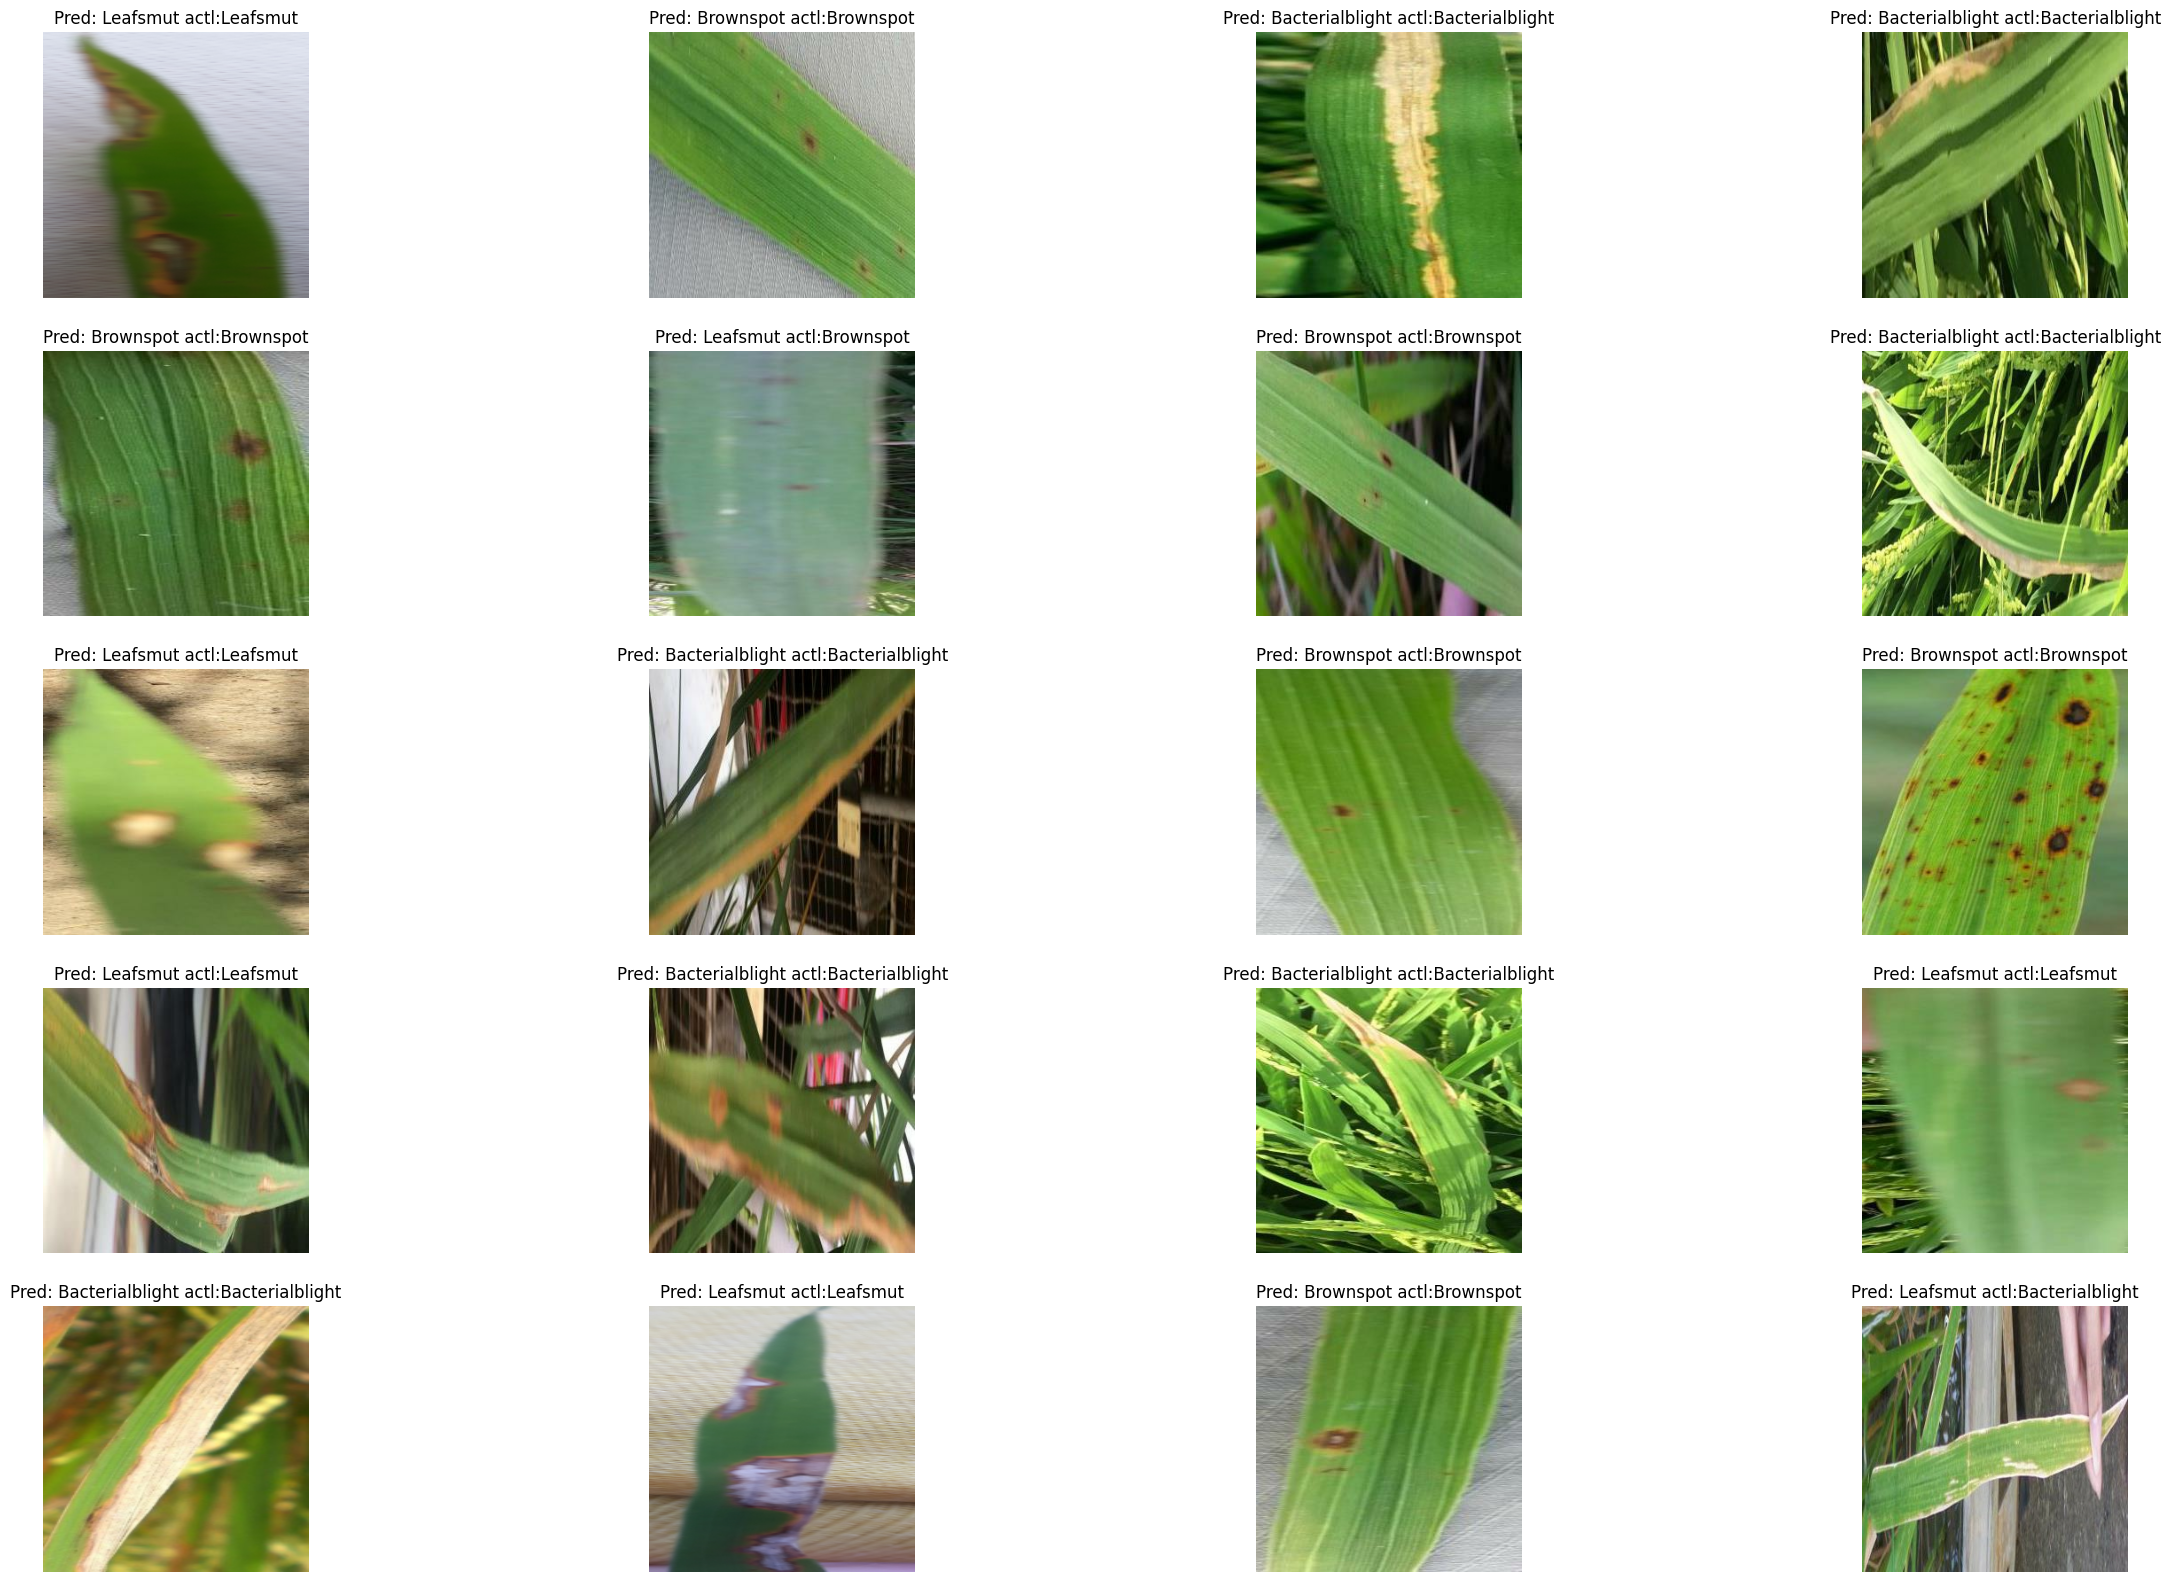

In [12]:
AccuracyVector = []
plt.figure(figsize=(30, 20))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)


In [13]:
model.save('riceplantdetectionmodel.h5',include_optimizer=True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
